#Токенізація

In [ ]:
text = 'Я люблю програмування та я люблю досліджувати природу'
tokens = text.split()
print(tokens)

['Я', 'люблю', 'програмування', 'та', 'я', 'люблю', 'досліджувати', 'природу']


In [ ]:
vocab = {}
ids = []
next_id = 0
for t in tokens:
  if t not in vocab:
    vocab[t] = next_id
    next_id += 1
  ids.append(vocab[t])

print("Tockens:", tokens)
print("Vocab:", vocab)
print("IDs:", ids)

Tockens: ['Я', 'люблю', 'програмування', 'та', 'я', 'люблю', 'досліджувати', 'природу']
Vocab: {'Я': 0, 'люблю': 5, 'програмування': 2, 'та': 3, 'я': 4, 'досліджувати': 6, 'природу': 7}
IDs: [0, 1, 2, 3, 4, 5, 6, 7]


#Ембідінг

In [ ]:
import numpy as np

emb = {
    'кіт': np.array([0.9, 0.1, 0.0]),
    'собака': np.array([0.85, 0.15, 0.0]),
    'машина': np.array([0.0, 0.2, 0.9])
}

def cosine_sim(a, b):
  return np.dot(a, b) / (np.linalg.norm(a)* np.linalg.norm(b)) #cos(γ)

print('Схожість "кіт" та "собака":', round(cosine_sim(emb['кіт'], emb['собака']), 3))
print('Схожість "кіт" та "машина":', round(cosine_sim(emb['кіт'], emb['машина']), 3))

Схожість "кіт" та "собака": 0.998
Схожість "кіт" та "машина": 0.024


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = list(emb.keys())
vectors = np.array(list(emb.values()))

print("words", words)
print("list(emb.values())", list(emb.values()))
print("vectors", vectors)

words ['кіт', 'собака', 'машина']
list(emb.values()) [array([0.9, 0.1, 0. ]), array([0.85, 0.15, 0.  ]), array([0. , 0.2, 0.9])]
vectors [[0.9  0.1  0.  ]
 [0.85 0.15 0.  ]
 [0.   0.2  0.9 ]]


In [ ]:
pca = PCA(n_components = 2)
reduced_vectors = pca.fit_transform(vectors)

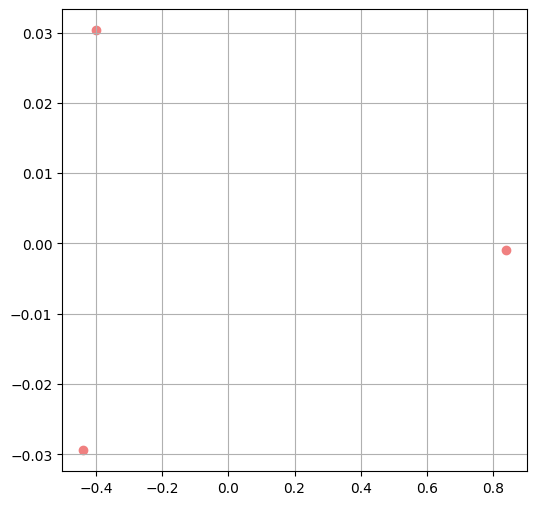

In [ ]:
plt.figure(figsize = (6, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color = 'lightcoral')


plt.grid(True)
plt.show()

#Attention - обробка слів, які важливі, які ні

In [ ]:
import numpy as np # Імпорт numpy

X = np.array([
    [1.0, 0.0, 0.5, 0.0], # токен А
    [0.0, 1.0, 0.0, 0.5], # токен В
    [1.0, 1.0, 0.0, 0.0], # токен С
])

print("Start (X):\n", np.round(X, 3))

np.random.seed(1)
Wq = np.random.randn(4, 4) * 0.1
Wk = np.random.randn(4, 4) * 0.1
Wv = np.random.randn(4, 4) * 0.1

Q = X.dot(Wq)
K = X.dot(Wk)
V = X.dot(Wv)

print(Q.shape)
d_k = Q.shape[-1]
score = Q.dot(K.T) / np.sqrt(d_k) # Обчислення подібності між словами та масштабування значень

# Перетворення значень в вагу (наскільки це слово нам підійде)
def softmax(x):
  e_x = np.exp(x - np.max(x, axis =- 1, keepdims = True))
  return e_x / e_x.sum(axis =- 1, keepdims = True)

weights = softmax(score)

# Створення нового представлення слова (підійшло слово або ні)
attn_output = weights.dot(V)

# Score - показує "сирі" співпадіння між запитами і ключами (можуть бути різними)
print("Score (Q.dot(K.T) / np.sqrt(d_k)):\n", np.round(score, 3))

# weights - норомалізовані значення (сума по рядку = 1) - це скільки уваги "дається" кожному слову
print("Attention weight (after softmax)\n", np.round(weights, 3))

#attn_output - нове представлення токенів, яке врахожує інші слова
print("Attention output (shape {})\n".format(attn_output.shape),np.round(attn_output, 3))

Start (X):
 [[1.  0.  0.5 0. ]
 [0.  1.  0.  0.5]
 [1.  1.  0.  0. ]]
(3, 4)
Score (Q.dot(K.T) / np.sqrt(d_k)):
 [[ 0.006 -0.019 -0.023]
 [ 0.015 -0.017 -0.004]
 [ 0.02  -0.035 -0.024]]
Attention weight (after softmax)
 [[0.339 0.331 0.33 ]
 [0.339 0.328 0.333]
 [0.344 0.326 0.33 ]]
Attention output (shape (3, 4))
 [[-0.122 -0.067  0.055  0.112]
 [-0.122 -0.067  0.055  0.111]
 [-0.122 -0.067  0.054  0.111]]


#Transformer

Структура Transformer:


Вхідні слова (після токенізації) -> Ембединг (переводить слова в числа - вектори) -> *БАГАТО ШАРІВ* Self-Attention (визначає, які слова важливі одне для одного) -> Нормалізація(допомагає навчитися стабільно) -> Feed Forward (уточнює результати) -> Вихід (наступне слово / відповідь)

Self-Attention - увага до себе!

Кожне слов "дивиться" на інші слова в речені.

Q - що я шукаю  
K - що в мені є  
V - зміст слова

Приклад:  
"Кіт сидить на килимові."  
Слово "Кіт" звертає увагу на слово "сидить" (бо це дієслово, що стосується кота), але не дуже - на "килимі".

In [10]:
import numpy as np

words = ["кіт", "сидить", "килимі"]

X = np.array([
    [1.0, 0.0, 0.5], # кіт
    [0.9, 0.1, 0.3], # сидить
    [0.2, 0.9, 0.0] # килимі
])

np.random.seed(42)
Wq = np.random.randn(3, 3) * 0.1
Wk = np.random.randn(3, 3) * 0.1
Wv = np.random.randn(3, 3) * 0.1

Q = X @ Wq # X.dot(Wq)
K = X @ Wk # X.dot(Wk)
V = X @ Wv # X.dot(Wv)

# print(X.dot(Wq))
# print(X @ Wv)

#Homework
scores = Q @ (K.T) / np.sqrt(K.shape[-1])
weights = np.exp(scores) / np.sum(np.exp(scores), axis =- 1, keepdims = True)
attention_output = weights @ V

print("Матриця уваги:\n", np.round(weights, 2))
print("Результат після уваги:\n", np.round(attention_output, 2))

Матриця уваги:
 [[0.33 0.33 0.33]
 [0.33 0.33 0.33]
 [0.33 0.33 0.33]]
Результат після уваги:
 [[-0.09 -0.09  0.02]
 [-0.09 -0.09  0.02]
 [-0.09 -0.09  0.02]]


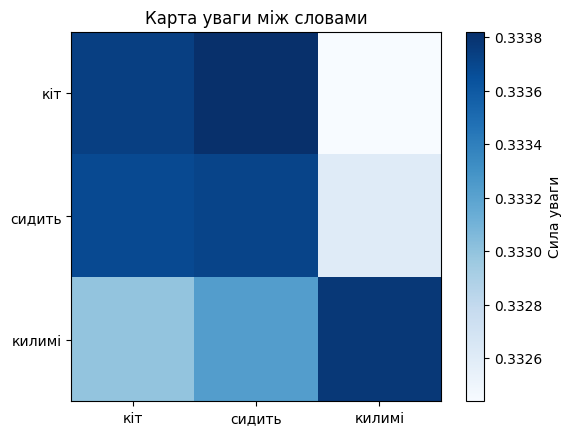

In [13]:
import matplotlib.pyplot as plt

plt.imshow(weights, cmap = 'Blues') #vmin = -1, vmax = 1
plt.xticks(ticks = range(3), labels = words)
plt.yticks(ticks = range(3), labels = words)
plt.colorbar(label = "Сила уваги")
plt.title("Карта уваги між словами")
plt.show()

# Проєкт "Шкільний помічник пошуку"

In [14]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# база знань
texts = [
    "Сонце - це зоря, яка знаходиться в центрі нашої Сонячної системи.",
    "Кисень необхідний для дихання живих організмів.",
    "Вода замерзає при температурі в 0 градусів Цельсія.",
    "Теорема Піфагора використовується для прямокутних трикутників.",
    "Тараз Шевченко - відомий український поет і художник.",
    "Дерева виробляють кисень, яким ми дихаємо.",
    "Амазонка є найдовшою та найповноводнішою річкою світу.",
    "Коралові рифи створюються з колоній дрібних морських тварин.",
    "Соняшник обертається за рухом сонця протягом дня.",
    "Полярні ведмеді мають чорну шкіру під білим хутром.",
    "Бджоли відіграють важливу роль у запиленні рослин.",
    "У пустелі Сахара вдень температура може перевищувати 50 градусів.",
    "Дельфіни здатні спати, залишаючи одне око відкритим.",
    "Гори займають близько чверті поверхні Землі.",
    "Райдуга виникає, коли сонячне світло заломлюється у краплях дощу."
]

Ембідінг: створюємо модель для перетворення тексту в числа

In [15]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
 embeddings = model.encode(texts, convert_to_tensor = True)
 print("Кількість речень:", len(texts))
 print("Розмір векторів:", embeddings.shape)

Кількість речень: 15
Розмір векторів: torch.Size([15, 384])


In [17]:
print(embeddings)

tensor([[ 0.2592,  0.1952,  0.0143,  ..., -0.2451, -0.3912,  0.1563],
        [-0.1071,  0.3267, -0.1032,  ...,  0.0195,  0.0757,  0.0507],
        [-0.2706,  0.2923,  0.1658,  ..., -0.1814, -0.2944,  0.2046],
        ...,
        [-0.0014, -0.3931,  0.2118,  ...,  0.1334,  0.5379, -0.0972],
        [-0.0406, -0.1506,  0.1846,  ..., -0.0361,  0.0024, -0.2640],
        [ 0.0748,  0.0917,  0.1567,  ...,  0.0067,  0.1485,  0.1404]])


In [18]:
query = input("Введіть своє питання: ")
query_embedding = model.encode(query, convert_to_tensor = True)

Введіть своє питання: Що таке Сонце?


In [20]:
consine_scores = util.cos_sim(query_embedding, embeddings)[0]
print(consine_scores)

tensor([ 0.7869,  0.0758,  0.1182,  0.0661, -0.0246,  0.1523, -0.0183,  0.0567,
         0.7289,  0.1188,  0.2068,  0.3367,  0.2719,  0.1703,  0.4515])


Знаходження індексу найкращого значення

In [22]:
best_match_idx = np.argmax(consine_scores)

print(f"Краща відповідь на питання '{query}':")
print(texts[best_match_idx])

Краща відповідь на питання 'Що таке Сонце?':
Сонце - це зоря, яка знаходиться в центрі нашої Сонячної системи.
